## Assignment 3: Classification: Will this Household Renew Its Season Pass?

##### By Shimony Agrawal

In [1]:
%cd /Users/shimonyagrawal/Desktop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/shimonyagrawal/Desktop


## Part 1: Logistic Regression

#### A. Bring the dataset into your environment, and use the head() function to explore the variables.

In [2]:
nyc_historical = pd.read_csv('nyc_historical.csv')

In [3]:
nyc_historical.head(15)

,householdID,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,homestate,FB_Like,renew
0,44,20,9.8,32.4,27.2,70.7,0,1,CT,1,1
1,57,20,11.7,71.8,40.8,1.6,0,1,CT,1,1
2,63,20,9.8,27.4,25.7,74.9,0,1,CT,1,1
3,159,17,2.2,1.5,91.1,28.9,1,1,CT,0,1
4,162,19,3.4,5.0,12.0,9.2,0,1,CT,0,1
5,165,19,2.2,37.5,18.4,76.3,1,1,CT,1,1
6,186,20,10.8,88.0,51.9,47.6,0,1,CT,1,1
7,199,20,8.3,23.8,90.1,50.0,0,1,CT,0,1
8,235,18,8.9,27.9,46.6,64.0,0,1,CT,0,1
9,249,18,11.9,8.8,170.2,11.6,0,1,CT,0,1


#### B. Which of your variables are categorical? Which are numerical?

In the dataset, the categorical variable is Homestate which signifies the location the household is based in. All the other variables are numerical. 


#### C. For your categorical variables, do you need to take any steps to convert them into dummies, in order to build a logistic regression model? Why or why not?

Logistic Regression fits the data into the model using the Maximum Likelihood Estimate (MLE) that interprets the characteristic of the input values and based on that gives an outcome. Our input variable is renew i.e. whether the family will renew the membership for the following season. This is in form of 1 or 0 values. Regression model can only deal with continous data and hence, we can't input a categorial value in it. Logistic Regression can handle categorical variables only if you perform encoding on them. Here, we perform one hot encoding using the get_dummies() function to assign 1 or 0 to the categories. 

#### D. For any variables that need to be dummified, use the get_dummies() function from pandas to convert them into the right format. Be sure to specify that one level should be dropped.

In [4]:
nyc_dummies = pd.get_dummies(nyc_historical, drop_first = True, columns = ['homestate']) 
nyc_dummies.head(15)

,householdID,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,FB_Like,renew,homestate_NJ,homestate_NY
0,44,20,9.8,32.4,27.2,70.7,0,1,1,1,0,0
1,57,20,11.7,71.8,40.8,1.6,0,1,1,1,0,0
2,63,20,9.8,27.4,25.7,74.9,0,1,1,1,0,0
3,159,17,2.2,1.5,91.1,28.9,1,1,0,1,0,0
4,162,19,3.4,5.0,12.0,9.2,0,1,0,1,0,0
5,165,19,2.2,37.5,18.4,76.3,1,1,1,1,0,0
6,186,20,10.8,88.0,51.9,47.6,0,1,1,1,0,0
7,199,20,8.3,23.8,90.1,50.0,0,1,0,1,0,0
8,235,18,8.9,27.9,46.6,64.0,0,1,0,1,0,0
9,249,18,11.9,8.8,170.2,11.6,0,1,0,1,0,0


#### E. Create a data partition. Assign 40% of your rows to your test set, and 60% to your training set.

In [5]:
X = nyc_dummies[['visits','avgrides_perperson','avgmerch_perperson','avggoldzone_perperson',
                 'avgfood_perperson','goldzone_playersclub','own_car',
                 'homestate_NJ','homestate_NY','FB_Like']]
y = nyc_dummies['renew']

In [6]:
X.corr()

,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,homestate_NJ,homestate_NY,FB_Like
visits,1.000000,0.007144,-0.001957,0.014787,0.011928,-0.002978,0.008785,0.005430,-0.014929,-0.004384
avgrides_perperson,0.007144,1.000000,-0.037131,0.002382,-0.012097,-0.011219,-0.001298,0.013509,0.011428,-0.015478
avgmerch_perperson,-0.001957,-0.037131,1.000000,-0.013894,-0.007268,0.017161,-0.016104,0.021966,-0.001084,-0.006174
avggoldzone_perperson,0.014787,0.002382,-0.013894,1.000000,-0.003143,-0.007030,0.018015,0.004293,0.013179,-0.035525
avgfood_perperson,0.011928,-0.012097,-0.007268,-0.003143,1.000000,-0.003205,-0.009541,0.033650,-0.032738,0.008632
goldzone_playersclub,-0.002978,-0.011219,0.017161,-0.007030,-0.003205,1.000000,-0.029182,0.016588,-0.005802,0.010042
own_car,0.008785,-0.001298,-0.016104,0.018015,-0.009541,-0.029182,1.000000,-0.023303,-0.007338,0.019314
homestate_NJ,0.005430,0.013509,0.021966,0.004293,0.033650,0.016588,-0.023303,1.000000,-0.502695,-0.003650
homestate_NY,-0.014929,0.011428,-0.001084,0.013179,-0.032738,-0.005802,-0.007338,-0.502695,1.000000,-0.015332
FB_Like,-0.004384,-0.015478,-0.006174,-0.035525,0.008632,0.010042,0.019314,-0.003650,-0.015332,1.000000


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 654)

#### F. Build a logistic regression model using Python, with the outcome variable renew. Use the rest of the variables from the dataset as inputs (except householdID). Remember to use only your training data to build this model.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
 

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

import statsmodels.api as sm

logreg1 = sm.Logit(y,X)
result = logreg1.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.580246
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.091     
Dependent Variable:   renew             AIC:               3733.5763 
Date:                 2020-10-25 23:30  BIC:               3794.2854 
No. Observations:     3200              Log-Likelihood:    -1856.8   
Df Model:             9                 LL-Null:           -2041.9   
Df Residuals:         3190              LLR p-value:       3.0871e-74
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
visits                 0.1123   0.0083 13.4691 0.0000  0.0960  0.1287
avgrides_perpers

The above model describes the relevance of the chosen variables. For instance, the variables average rides per person, average merch per person, average gold zone per person and average food per person have a lesser impact on the our output variable - renew (whether the family will renew their membership). Variables with p-values less than 0.05 have a stronger impact on our output variable. 

#### G. Show your model’s coefficients.
#### a. Which variables are associated with greater likelihood of renewal? Which ones are associated with lower likelihood of renewal? Which variables appear to influence the outcome variable the most? Which ones have the least impact? (When you answer this, keep in mind that the variables may not all be measured in the same units).

The variables with positive coefficients indicate closeness to the likelihood of a renewal whereas the variables with a negative coefficient have a lower likelihood of renewal. Variables like homestate (New Jersey) and Facebook Likes are associated with a lower likelihood of renewal. 

In terms of impact, being a part of the Gold Zone Player's club, more number of visits and having your own car had the most significant influence on renewal of membership. Average gold zone spending per person, average spending on food and merchandise have the least impact on the likelihood of renewal of membership. 

#### b. Write a paragraph about why some variables might be positively or negatively associated with the outcome.

Some variables like how much you spend on food or merchandise don't affect the decision of whether or not you will continue with the membership. These variables are like a added benefit of the membership. Likewise getting likes on Facebook is not a relevant factor in the deciding whether to renew or not. Most of these adventure parks are located in the outskirts of cities, so transportation is a major factor when it comes to investing in the membership. Additionally, the Gold Zone Player's Club will give benefits to its members like Express Passes, VIP lounges, parking services and many more. So if you are already a part of the club and have experienced the perks, you are more likely to renew the memberships. Lastly, the number of visits you have had to the park demonstrates whether you enjoyed the experience or not and hence, is one of the key influencers. 

In [27]:
logreg.coef_

array([[ 0.12428747,  0.06428279,  0.00593199,  0.00189176,  0.00288506,
         0.41243246,  0.79388107, -0.09969838,  0.07614854, -0.06870928]])

In [28]:
pd.DataFrame(data = logreg.coef_.transpose(),index=X_train.columns,columns=['Coef'])

,Coef
visits,0.124287
avgrides_perperson,0.064283
avgmerch_perperson,0.005932
avggoldzone_perperson,0.001892
avgfood_perperson,0.002885
goldzone_playersclub,0.412432
own_car,0.793881
homestate_NJ,-0.099698
homestate_NY,0.076149
FB_Like,-0.068709


#### H. Show your model’s accuracy against the training set, and against the test set.

In [29]:
# Logistic Regression Model Fitting 

logreg.fit(X_train, y_train)

# Predicting test results 

y_pred = logreg.predict(X_test)

In [30]:
# Calculating the accuracy of our model 

print("Training accuracy of Logistic Regression model:", logreg.score(X_train, y_train).round(3))
print("Testing accuracy of Logistic Regression model:", logreg.score(X_test, y_test).round(3))

Training accuracy of Logistic Regression model: 0.689
Testing accuracy of Logistic Regression model: 0.706


#### a. What is the purpose of comparing those two values?

We compare the training and testing accuracies to better understand how our model is performing. If the accuracies are similar to each other, the model is behaving in a similar way but if they are far from each other than there is a huge difference in their performance. This indicates that the testing data is not reliable and that there is overfitting in the data. 

#### b. In this case, what does the comparison of those values suggest about the model that you have built?

In our logistic regression model, the training accuracy is 68% and testing accuracy is 70% which indicates that the model are behaving similar to each other. A difference of 0.01 is too small to detect any overfitting in the data and hence, the model is working properly.  

#### I. Assess the performance of your model against the test set. Build a confusion matrix, and answer the following questions about your model. 

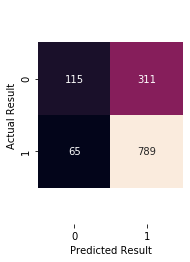

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = logreg.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [32]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix (y_test,y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.27      0.38       426
           1       0.72      0.92      0.81       854

    accuracy                           0.71      1280
   macro avg       0.68      0.60      0.59      1280
weighted avg       0.69      0.71      0.67      1280



#### a. What is your model’s accuracy rate? 

The model's accuracy rate is 71%. 

#### b. What is your model’s sensitivity rate?

The model's sensitivity rate for likelihood of renewal (1) is 92% and no renewal (0) is 27%. 

#### c. What is your model’s specificity rate?

The model's specificity rate is 27%. 

#### d. What is your model’s precision?

The model's precision for likelihood of renewal (1) is 72% and no renewal (0) is 64%. 

#### e. What is your model’s balanced accuracy?

The balanced accuracy is 60%. 

#### J. Make up a household. Assign this household a value for each predictor variable in this model, and store the results in a new dataframe. Now, put your household through this model.

In [33]:
fiction = pd.DataFrame([{'visits': 15 ,
                         'avgrides_perperson' : 10,
                         'avgmerch_perperson' : 60,
                         'avggoldzone_perperson' : 150,
                         'avgfood_perperson' : 50,
                         'goldzone_playersclub' : 1,
                         'own_car' : 1,
                         'homestate_NJ' : 0,
                         'homestate_NY' : 1, 
                         'FB_Like' : 1}])
fiction

,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,homestate_NJ,homestate_NY,FB_Like
0,15,10,60,150,50,1,1,0,1,1


In [34]:
newprediction = logreg.predict(fiction)
print(newprediction)

logreg.predict_proba(fiction).round(2) 

[1]


array([[0.06, 0.94]])

#### a. What did your model predict -- will this household renew?

The model predicted that household will renew their membership for the next season. 

#### b. According to your model, what is the probability that this household will renew?

According to the model, there is a 60% probability of the household not renewing the membership and a 94% chance of the household renewing the membership. This indicates a higher possibility of renewing the membership. 

#### K. Why is it important for a marketer to not only know the predicted classification outcome of the model, but also to know the probability associated with that predicted outcome?

#### a. If you were in charge of the Marketing Analytics team at Lobster Land, how would you use the predicted probabilities to help you determine how to reach out to existing passholders about renewing?


Knowning the probability of the outcome can help in simplifing the problem and makes it easier to interpret. Also, it captures the ambiguity in the data and allows the marketer to interpret the probabilities in the context of the domain. These probabilities can be grouped into a categories for easier interpretation. Additionally, for models that predict class membership the probability estimation provides a framework to minimize the difference or divergence between actual and predicted probability distribtuion. 

Being in charge of the Marketing Analytics team, I would use the probabilities to better understand the factors or variables that are affecting the decision of my target audience. I would then leverage on those variables and launch campaigns that would cater to their needs. For instance, if there is a higher probability of people renewing the membership if they own a car but still there is ~10% probability of not being renewed, then I would start shuttle services to and from LobsterLand. Similarly, if there is more probability of membership being renewed by members of the Gold Zone Players Club, then I would have advertising campaigns that offers bundling options like getting the membership and club pass at discounted rates. 

#### L. When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?

Logistic Regression pushes the values in the range of 0 and 1 - even when we chose values outside the range. Values are hence, choosen within the range so that the model is well-fitted. This is also called interpolation. 

#### a. Make a new dataframe, but this time, for the numeric predictor variables, select some numbers that are outside the range of the dataset. Use your model to make a prediction for this new dataframe. What do you notice about the result? 

In [15]:
nyc_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   householdID            3200 non-null   int64  
 1   visits                 3200 non-null   int64  
 2   avgrides_perperson     3200 non-null   float64
 3   avgmerch_perperson     3200 non-null   float64
 4   avggoldzone_perperson  3200 non-null   float64
 5   avgfood_perperson      3200 non-null   float64
 6   goldzone_playersclub   3200 non-null   int64  
 7   own_car                3200 non-null   int64  
 8   homestate              3200 non-null   object 
 9   FB_Like                3200 non-null   int64  
 10  renew                  3200 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 275.1+ KB


In [35]:
fiction2 = pd.DataFrame([{'visits': 0 ,
                          'avgrides_perperson' : 5, 
                          'avgmerch_perperson' : 1 ,
                          'avggoldzone_perperson': 20,
                          'avgfood_perperson': 9 ,
                          'goldzone_playersclub' : 0 ,
                          'own_car' : 1, 
                          'homestate_NJ' : 0 ,
                          'homestate_NY' : 0, 
                          'FB_Like' : 0}])
fiction2

,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,homestate_NJ,homestate_NY,FB_Like
0,0,5,1,20,9,0,1,0,0,0


In [37]:
newprediction2 = logreg.predict(fiction2)
print(newprediction2)

logreg.predict_proba(fiction2).round(3)

[0]


array([[0.623, 0.377]])

Upon chosing values outside the range, the model gave a prediction of no renewal of membership by the household. With a 62% probability of the membership not being renewed. This is because in the regression model prediction within the range determines the model fit. If the values go outside the range then it is known as extrapolation. The further the values are, the higher the the chances of the model to fail due to differences in predicted and actual values. 

## Part 2: Random Forest Model 

#### M. Build a random forest model in Python with your training set. Use the same input variables, and same output variable, as you used in the logistic regression model. Use GridSearch CV to help you determine which hyperparameters to use for n_estimators, max_depth, and max_features (and if you wish to explore other hyperparameters, you may do so).

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train) #Train the model on training data 

# Predicting the test results 
  
y_pred = clf.predict(X_test)

In [19]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
3,0.172957,avggoldzone_perperson
4,0.170621,avgfood_perperson
2,0.169998,avgmerch_perperson
1,0.166288,avgrides_perperson
0,0.158101,visits
7,0.049965,homestate_NJ
6,0.038660,own_car
8,0.025833,homestate_NY
5,0.023969,goldzone_playersclub
9,0.023607,FB_Like


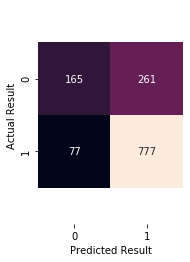

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [21]:
from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49       426
           1       0.75      0.91      0.82       854

    accuracy                           0.74      1280
   macro avg       0.72      0.65      0.66      1280
weighted avg       0.73      0.74      0.71      1280



In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
param_grid={'n_estimators':[50,90,100], 
           'max_depth':[2,4,6,8], 
           'max_features':[8,12,16,20], 
           'min_samples_leaf':[2,4,6,10]}

In [23]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = clf, 
                      param_grid = param_grid, 
                      cv = 5)

CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/skl

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 90}


In [38]:
clf = RandomForestClassifier(n_estimators = 90, max_depth = 8, max_features = 8, min_samples_leaf = 6, random_state=654)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=654,
                       verbose=0, warm_start=False)

#### N. How did your random forest model rank the variables in order of importance, from highest to lowest? For a random forest model, how can you interpret feature importance?

In [39]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
0,0.224039,visits
1,0.139165,avgrides_perperson
3,0.131432,avggoldzone_perperson
7,0.129282,homestate_NJ
2,0.122840,avgmerch_perperson
4,0.099435,avgfood_perperson
6,0.075663,own_car
5,0.041998,goldzone_playersclub
8,0.023963,homestate_NY
9,0.012184,FB_Like


Feature Importance in a random forest model describe which features are relevant to the model and help in model improvement by employing model selection. Here, the top 3 features that influence the renewal of membership are number of visits, whether the homestate is New Jersey or not and the average rides per day per person. These variables seem a good fit to decide whether the household will renew the membership or not. 

However, there are two features which rank lower in the random forest model but were considered as being significantly impactful in the logistic regression model - owning a car and being a member of Gold Zone Players Club. 

#### O. Assess the performance of your model against the test set. Build a confusion matrix to do this. You can use Python functions to answer any of these questions or you can use your confusion matrix to determine the answers in a slightly more manual way. The ‘positive’ class in this model is represented by the “1” outcome -- that means that the passholder renewed for the next season.


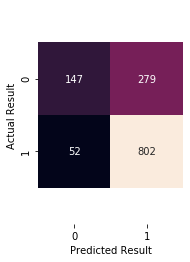

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [41]:
predictions = clf.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.35      0.47       426
           1       0.74      0.94      0.83       854

    accuracy                           0.74      1280
   macro avg       0.74      0.64      0.65      1280
weighted avg       0.74      0.74      0.71      1280



#### a. What is your model’s accuracy rate? 

The model's accuracy rate is 74%. 

#### b. What is your model’s sensitivity rate?

The model's sensitivity rate for likelihood of renewal (1) is 94% and no renewal (0) is 35%. 

#### c. What is your model’s specificity rate?

The model's specificity rate is 34%. 

#### d. What is your model’s precision?

The model's precision for likelihood of renewal (1) is 74% and no renewal (0) is 73%. 

#### e. What is your model’s balanced accuracy?

The balanced accuracy is 64%. 

#### P. Use the predict() function with your model to classify the household that you invented in Step I. Does the model think this person will renew?

In [42]:
newprediction_rf = clf.predict(fiction)
print(newprediction_rf)

clf.predict_proba(fiction).round(3)

[1]


array([[0.113, 0.887]])

The model predicted that the person will renew the membership with a 88% probability of renewing and 11% probability of not renewing. 

#### Q. Write a 3-5 sentence paragraph that speculates about the usefulness of a model that can predict a particular customer’s actions (rather than just make a general prediction about a huge number of people). 

In today's era, everything revolves around customisation. From haircare to electronics, these models can predict what a customer wants with just a questionnaire. With the enormous amount of data being fed to these models, they are becoming smarter than humans when it comes to predicting our actions. I feel these models are actually useful in predicting consumer behaviour. For example, I recently ordered a customised shampoo - I had to fill a questionnarie and based on that it selected the one that best met my needs. The entire experience was surreal - a computer algorithm was deciding what shampoo I should use based on a few questions. For marketers, this is a boon. They have to make sure the data they are providing to the model is accurate. Data Science has changed the way consumers shop with machine learning algorithms understanding human behaviour like never before. 